# Determinantal Point Process

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print ("Packages loaded.")

Packages loaded.


In [2]:
def get_color_2d(x):
    c = np.concatenate((x[:,0:1],x[:,1:2]),axis=1)
    c = (c-np.min(x,axis=0))/(np.max(x,axis=0)-np.min(x,axis=0))
    r, g, b = 1.0-c[:,1:2], c[:,0:1], 0.5-np.zeros_like(c[:,0:1])
    c = np.concatenate((r,g,b),axis=1)
    return c

def grid_2d(x0min,x0max,x1min,x1max,nx0,nx1):
    x0s,x1s = np.meshgrid(np.arange(x0min,x0max,(x0max-x0min)/nx0),
                          np.arange(x1min,x1max,(x1max-x1min)/nx1))
    x = np.dstack([x0s,x1s]).reshape(-1,2) 
    return x

In [3]:
x = grid_2d(0,1,0,1,100,100)
# (Optional) added some imbalanced data
x_imb = np.concatenate((x,grid_2d(0,1/4,0,1/4,100,100)),axis=0)

In [4]:
def get_dpp_subset_from_K(K,n_sel):
    n_total = K.shape[0]
    remain_idxs = np.arange(n_total)
    sub_idx = np.zeros((n_sel))
    sum_K_vec = np.zeros(n_total)
    for i_idx in range(n_sel):
        if i_idx == 0:
            sel_idx = np.random.randint(n_total)
        else:
            curr_K_vec = K[(int)(sub_idx[i_idx-1]),:] 
            sum_K_vec = sum_K_vec + curr_K_vec
            k_vals = sum_K_vec[remain_idxs]
            min_idx = np.argmin(k_vals)
            sel_idx = remain_idxs[min_idx] 
        sub_idx[i_idx] = (int)(sel_idx)
        remain_idxs = np.delete(remain_idxs,np.argwhere(remain_idxs==sel_idx))
    sub_idx = sub_idx.astype(np.int) # make it int
    return sub_idx

def get_dpp_subset(x,n_sel,alpha=1000):
    from scipy.spatial import distance
    D = distance.cdist(x,x,'sqeuclidean') 
    K = np.exp(-alpha*D)
    sub_idx = get_dpp_subset_from_K(K,n_sel)
    x_sel = x[sub_idx,:] 
    return x_sel,sub_idx

def get_dpp_subset_trim(x,n_sel,alpha=1000):
    n_total = x.shape[0]
    n_th = 5000 # we assume that (n_th > n_sel)
    if n_total > n_th:
        x_temp,sub_idx_temp = get_rand_subset(x,n_sel=n_th)
        x_sel,sub_idx_local = get_dpp_subset(x_temp,n_sel=n_sel,alpha=alpha)
        sub_idx = sub_idx_temp[sub_idx_local]
    else:
        x_sel,sub_idx = get_dpp_subset(x,n_sel=n_sel,alpha=alpha)
    return x_sel,sub_idx

def get_rand_subset(x,n_sel):
    n_total = x.shape[0]
    sub_idx = np.random.permutation(n_total)[:n_sel]
    x_sel = x[sub_idx,:] 
    return x_sel,sub_idx

In [5]:
n_sel = 100
c = get_color_2d(x) # compute the color *after* the projection
x_dpp,idx_dpp = get_dpp_subset_trim(x,n_sel=n_sel,alpha=500)
x_rand,idx_rand = get_rand_subset(x,n_sel=n_sel)
c_dpp,c_rand = c[idx_dpp,:],c[idx_rand,:]

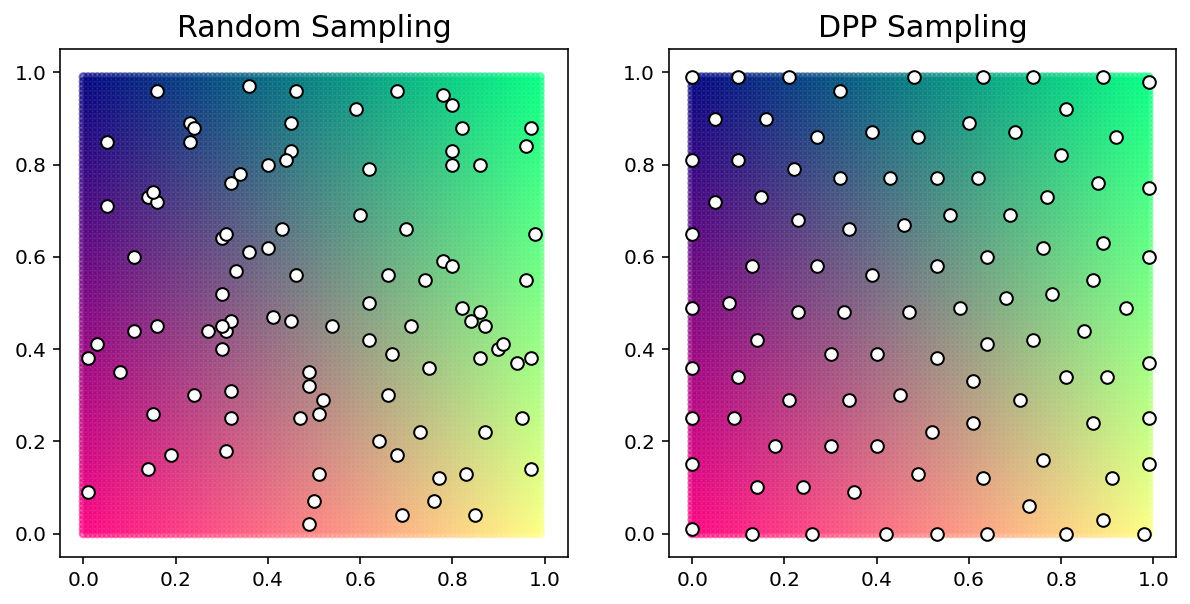

In [6]:
# Plot 
am,ma,ms,ms2 = 0.05,0.5,15,40
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(x[:,0],x[:,1],c=c,edgecolors=c,s=ms,marker='o',alpha=ma)
plt.scatter(x_rand[:,0],x_rand[:,1],c='w',edgecolors='k',s=ms2,marker='o',alpha=1.0)
plt.title("Random Sampling",fontsize=15)
plt.axis('square')
plt.axis([0-am,1+am,0-am,1+am])

plt.subplot(122)
plt.scatter(x[:,0],x[:,1],c=c,edgecolors=c,s=ms,marker='o',alpha=ma)
plt.scatter(x_dpp[:,0],x_dpp[:,1],c='w',edgecolors='k',s=ms2,marker='o',alpha=1.0)
plt.axis('square')
plt.title("DPP Sampling",fontsize=15)
plt.axis([0-am,1+am,0-am,1+am])
plt.show()

In [7]:
n_sel = 100
x = x_imb
c = get_color_2d(x) # compute the color *after* the projection
x_dpp,idx_dpp = get_dpp_subset(x,n_sel=n_sel,alpha=500)
x_rand,idx_rand = get_rand_subset(x,n_sel=n_sel)
c_dpp,c_rand = c[idx_dpp,:],c[idx_rand,:]

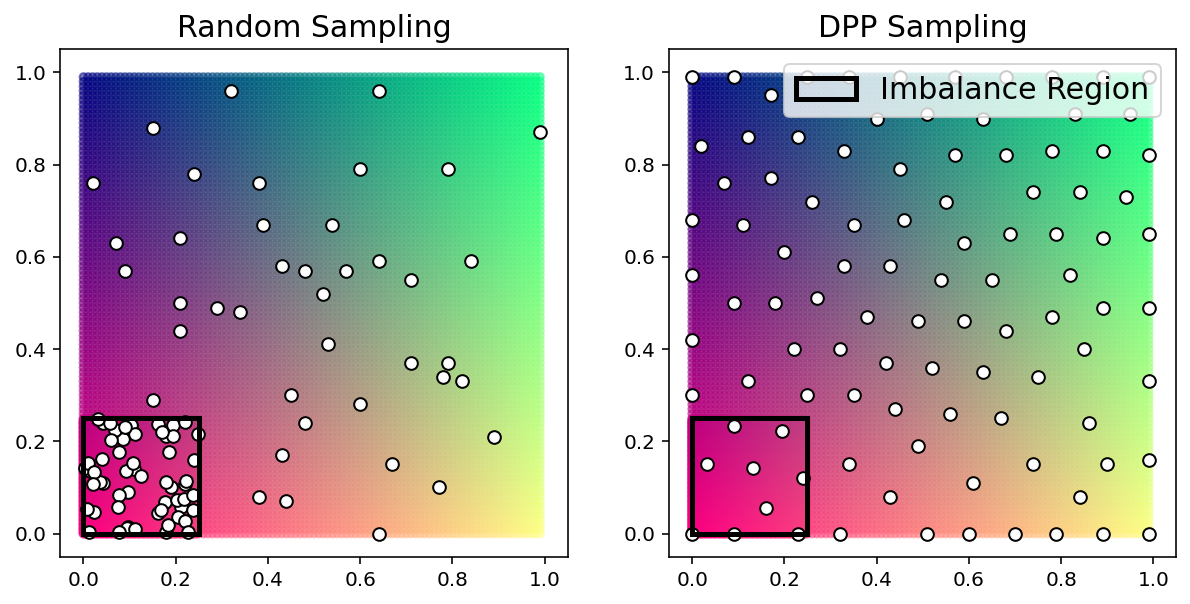

In [8]:
# Plot 
am,ma,ms,ms2 = 0.05,0.5,15,40
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(x[:,0],x[:,1],c=c,edgecolors=c,s=ms,marker='o',alpha=ma)
plt.scatter(x_rand[:,0],x_rand[:,1],c='w',edgecolors='k',s=ms2,marker='o',alpha=1.0)
rect = plt.Rectangle(xy=(0,0),width=1/4,height=1/4,fill=False,edgecolor='k',linewidth=2.5)
plt.gca().add_patch(rect)
plt.title("Random Sampling",fontsize=15)
plt.axis('square')
plt.axis([0-am,1+am,0-am,1+am])

plt.subplot(122)
plt.scatter(x[:,0],x[:,1],c=c,edgecolors=c,s=ms,marker='o',alpha=ma)
plt.scatter(x_dpp[:,0],x_dpp[:,1],c='w',edgecolors='k',s=ms2,marker='o',alpha=1.0)
rect = plt.Rectangle(xy=(0,0),width=1/4,height=1/4,fill=False,edgecolor='k',linewidth=2.5,
                    label='Imbalance Region')
plt.gca().add_patch(rect)
plt.axis('square')
plt.title("DPP Sampling",fontsize=15)
plt.axis([0-am,1+am,0-am,1+am])
plt.legend(loc='upper right',fontsize=15)
plt.show()